Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

<hr>

We forget that there are categorical signs in the sample, and we will try to teach a gradient-based boosting over trees on the existing matrix "objects-signs". Lock the cross-validation generator into 5 blocks (KFold), do not forget to shuffle the sample (shuffle = True), because the data in the table is sorted by time, and without undue effects you may encounter undesirable effects when evaluating the quality. Evaluate the quality of GradientBoostingClassifier with this cross-validation, try different number of trees (at least test the following values ​​for the number of trees: 10, 20, 30). How long were the classifiers tuned? Is the optimum reached by the tested values ​​of the parameter values, or is the quality likely to continue to grow with its further expansion?

In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('./train_herobag.csv')
test=pd.read_csv('./test_herobag.csv')
X=data
y=data.radiant_win
data.drop(["match_id","radiant_win"],axis=1,inplace=True)

In [4]:
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=1)
scoring='roc_auc'
ansr=-1
scores=[]
for num in [10,20,30,50,100,250]:
    print num
    start_time = datetime.datetime.now()
    clf = GradientBoostingClassifier(random_state=1,n_estimators=num)
    scr=cross_val_score(clf, X, y, cv=cv,scoring = scoring).mean()
    scores.append(scr)
    print 'Time elapsed:', datetime.datetime.now() - start_time

10
Time elapsed: 0:00:44.520680
20


KeyboardInterrupt: 

[0.66483292280491013, 0.6821140369500347, 0.68969475420599047, 0.69711395260794939, 0.70621134605158908, 0.71566628888222172]


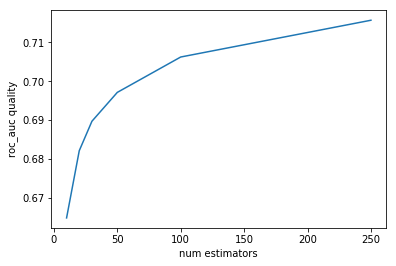

In [16]:
print scores
import matplotlib.pyplot as plt
plt.plot([10,20,30,50,100,250],scores)
plt.xlabel('num estimators')
plt.ylabel('roc_auc accuracy')
plt.show()

In [5]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': 500}
clf = GradientBoostingClassifier(**params)
clf.fit(data,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [6]:
ids=test["match_id"].as_matrix()
test.drop("match_id",axis=1,inplace=True)

In [7]:
pred=clf.predict_proba(test)
print pred

[[ 0.27622033  0.72377967]
 [ 0.27111008  0.72888992]
 [ 0.71555564  0.28444436]
 ..., 
 [ 0.82882267  0.17117733]
 [ 0.54698874  0.45301126]
 [ 0.4825138   0.5174862 ]]


In [8]:
df = pd.DataFrame({'match_id':ids, 'radiant_win': pred.T[1]})
print df
df.to_csv("predictionv1.csv", index=False)

       match_id  radiant_win
0             6     0.723780
1             7     0.728890
2            10     0.284444
3            13     0.880496
4            16     0.223668
5            18     0.539813
6            19     0.638587
7            24     0.573489
8            33     0.163727
9            37     0.497378
10           41     0.303508
11           42     0.507966
12           55     0.288380
13           60     0.663696
14           62     0.646599
15           63     0.548133
16           64     0.299868
17           71     0.494007
18           72     0.452107
19           83     0.525847
20           85     0.803408
21           89     0.839192
22           92     0.710271
23          100     0.911919
24          102     0.827007
25          108     0.628520
26          111     0.786571
27          126     0.194860
28          130     0.059304
29          140     0.820183
...         ...          ...
17147    114165     0.684791
17148    114168     0.726336
17149    11417